# Mine(EDAKING)

In [852]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [853]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape, test.shape)

(891, 12) (418, 11)


In [854]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [855]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [856]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [857]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [858]:
concat_all = pd.concat([train,test],ignore_index=True)

In [859]:
concat_all.shape

(1309, 12)

In [860]:
concat_all.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [861]:
concat_all.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [862]:
concat_all.groupby('Pclass')[['Survived']].mean().reset_index()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [863]:
concat_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [864]:
concat_all['Title'] = concat_all['Name'].str.extract('([A-Za-z]+)\.')

In [865]:
concat_all['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Mlle          2
Ms            2
Capt          1
Mme           1
Countess      1
Dona          1
Jonkheer      1
Don           1
Lady          1
Sir           1
Name: Title, dtype: int64

In [866]:
concat_all['Title'].replace(['Dr','Rev','Col','Major','Don','Capt','Countess','Jonkheer','Lady','Sir','Dona'],'Rare',inplace=True)
concat_all['Title'].replace('Mlle','Miss',inplace=True)
concat_all['Title'].replace('Ms','Miss',inplace=True)
concat_all['Title'].replace('Mme','Mrs',inplace=True)

In [867]:
concat_all['Title'].value_counts()

Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: Title, dtype: int64

In [868]:
concat_all.groupby('Title')[['Survived']].mean().sort_values(by='Survived',ascending=False)

,Survived
Title,
Mrs,0.793651
Miss,0.702703
Master,0.575000
Rare,0.347826
Mr,0.156673


In [869]:
concat_all['Title'] = concat_all['Title'].map({'Mrs':1,'Miss':2,'Master':3,'Rare':4,'Mr':5})

In [870]:
concat_all.drop('Name',axis=1,inplace=True)

In [871]:
concat_all.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,5
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,5


In [872]:
concat_all.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [873]:
concat_all['Sex'] = concat_all['Sex'].map({'female':1,'male':2})

In [874]:
concat_all.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,2,22.0,1,0,A/5 21171,7.2500,NaN,S,5
1,2,1.0,1,1,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1.0,1,1,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,2,35.0,0,0,373450,8.0500,NaN,S,5


In [875]:
concat_all.groupby('SibSp')[['Survived']].mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [876]:
concat_all.groupby('Parch')[['Survived']].mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000
9,NaN


In [877]:
concat_all['FamilySize'] = concat_all['SibSp'] + concat_all['Parch']

In [878]:
concat_all.groupby('FamilySize')[['Survived']].mean()

,Survived
FamilySize,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [879]:
concat_all['Alone'] = 0
concat_all.loc[ concat_all['FamilySize'] == 0,'Alone'] = 1

In [880]:
concat_all.groupby('Alone')[['Survived']].mean()

,Survived
Alone,
0,0.505650
1,0.303538


In [881]:
concat_all.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Alone
0,1,0.0,3,2,22.0,1,0,A/5 21171,7.2500,NaN,S,5,1,0
1,2,1.0,1,1,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0,1
3,4,1.0,1,1,35.0,1,0,113803,53.1000,C123,S,1,1,0
4,5,0.0,3,2,35.0,0,0,373450,8.0500,NaN,S,5,0,1


In [882]:
concat_all.drop(['SibSp','Parch','FamilySize'],axis=1,inplace=True)

In [883]:
concat_all.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Alone
0,1,0.0,3,2,22.0,A/5 21171,7.2500,NaN,S,5,0
1,2,1.0,1,1,38.0,PC 17599,71.2833,C85,C,1,0
2,3,1.0,3,1,26.0,STON/O2. 3101282,7.9250,NaN,S,2,1
3,4,1.0,1,1,35.0,113803,53.1000,C123,S,1,0
4,5,0.0,3,2,35.0,373450,8.0500,NaN,S,5,1


In [884]:
concat_all['Ticket'].value_counts()

CA. 2343             11
1601                  8
CA 2144               8
PC 17608              7
S.O.C. 14879          7
                     ..
STON/O 2. 3101285     1
A/5 3540              1
248744                1
PC 17607              1
C.A. 29566            1
Name: Ticket, Length: 929, dtype: int64

In [885]:
concat_all.drop('Ticket',axis=1,inplace=True)

In [886]:
concat_all.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
0,1,0.0,3,2,22.0,7.2500,NaN,S,5,0
1,2,1.0,1,1,38.0,71.2833,C85,C,1,0
2,3,1.0,3,1,26.0,7.9250,NaN,S,2,1
3,4,1.0,1,1,35.0,53.1000,C123,S,1,0
4,5,0.0,3,2,35.0,8.0500,NaN,S,5,1


In [887]:
concat_all['Fare'].isnull().sum()

1

In [888]:
concat_all[ concat_all['Fare'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
1043,1044,NaN,3,2,60.5,NaN,NaN,S,5,1


In [889]:
concat_all[ (concat_all['Pclass']==3) & (concat_all['Embarked']=='S') ]['Fare'].mean()

14.435422064777338

In [890]:
concat_all['Fare'].mean()

33.2954792813456

In [891]:
concat_all.loc[concat_all['Fare'].isnull(),'Fare'] = concat_all[ (concat_all['Pclass']==3) & (concat_all['Embarked']=='S') ]['Fare'].mean()

In [892]:
concat_all['Fare'].isnull().sum()

0

In [893]:
concat_all.loc[ concat_all['Cabin'].notnull(),'Cabin'] = [ cabin[0] for cabin in concat_all['Cabin'].dropna()]

In [894]:
concat_all['Cabin'].value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Cabin, dtype: int64

In [895]:
concat_all.groupby('Cabin')[['Fare']].mean().sort_values(by='Fare')

,Fare
Cabin,
G,14.205000
F,18.079367
T,35.500000
A,41.244314
D,53.007339
E,54.564634
C,107.926598
B,122.383078


In [896]:
concat_all['Cabin'].isnull().sum()

1014

In [897]:
concat_all.loc[ (concat_all['Cabin'].isnull()) & (concat_all['Fare'] <=14.2 ), 'Cabin'] = 'G'
concat_all.loc[ (concat_all['Cabin'].isnull()) & (concat_all['Fare'] >14.2 ) & (concat_all['Fare'] <=18), 'Cabin'] = 'F'
concat_all.loc[ (concat_all['Cabin'].isnull()) & (concat_all['Fare'] >18 & (concat_all['Fare'] <=35.5) ), 'Cabin'] = 'T'
concat_all.loc[ (concat_all['Cabin'].isnull()) & (concat_all['Fare'] >35.5 ) & (concat_all['Fare'] <=41.2), 'Cabin'] = 'A'
concat_all.loc[ (concat_all['Cabin'].isnull()) & (concat_all['Fare'] >41.2 ) & (concat_all['Fare'] <=53), 'Cabin'] = 'D'
concat_all.loc[ (concat_all['Cabin'].isnull()) & (concat_all['Fare'] >53 ) & (concat_all['Fare'] <=54.5), 'Cabin'] = 'E'
concat_all.loc[ (concat_all['Cabin'].isnull()) & (concat_all['Fare'] >54.5 ) & (concat_all['Fare'] <=107.9), 'Cabin'] = 'C'
concat_all.loc[ (concat_all['Cabin'].isnull()) & (concat_all['Fare'] >107.9 ), 'Cabin'] = 'B'

In [898]:
concat_all['Cabin'].isnull().sum()

0

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

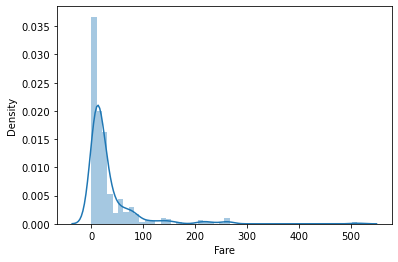

In [899]:
sns.distplot(concat_all['Fare'])

In [900]:
concat_all['FareBand'] = pd.qcut(concat_all['Fare'],4)

In [901]:
concat_all.groupby('FareBand')[['Survived']].mean()

,Survived
FareBand,
"(-0.001, 7.896]",0.197309
"(7.896, 14.454]",0.303571
"(14.454, 31.275]",0.441048
"(31.275, 512.329]",0.600000


In [902]:
concat_all.loc[ (concat_all['Fare'] <= 7.896) ,'Fare'] = 1
concat_all.loc[ (concat_all['Fare'] > 7.896) & (concat_all['Fare'] <= 14.454) ,'Fare'] = 2
concat_all.loc[ (concat_all['Fare'] > 14.454) & (concat_all['Fare'] <= 31.275) ,'Fare'] = 3
concat_all.loc[ (concat_all['Fare'] > 31.275) ,'Fare'] = 4

In [903]:
concat_all['Fare'] = concat_all['Fare'].astype(int)

In [904]:
concat_all.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone,FareBand
0,1,0.0,3,2,22.0,1,G,S,5,0,"(-0.001, 7.896]"
1,2,1.0,1,1,38.0,4,C,C,1,0,"(31.275, 512.329]"
2,3,1.0,3,1,26.0,2,G,S,2,1,"(7.896, 14.454]"
3,4,1.0,1,1,35.0,4,C,S,1,0,"(31.275, 512.329]"
4,5,0.0,3,2,35.0,2,G,S,5,1,"(7.896, 14.454]"


In [905]:
concat_all.drop('FareBand',axis=1,inplace=True)

In [906]:
concat_all.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
0,1,0.0,3,2,22.0,1,G,S,5,0
1,2,1.0,1,1,38.0,4,C,C,1,0
2,3,1.0,3,1,26.0,2,G,S,2,1
3,4,1.0,1,1,35.0,4,C,S,1,0
4,5,0.0,3,2,35.0,2,G,S,5,1


In [907]:
concat_all['Cabin'].value_counts()

G    617
T    311
F    113
C     94
B     65
D     46
E     41
A     22
Name: Cabin, dtype: int64

In [908]:
concat_all['Cabin'] = concat_all['Cabin'].map({'G':1,'T':2,'F':3,'C':4,'B':5,'D':6,'E':7,'A':8})

In [909]:
concat_all.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
0,1,0.0,3,2,22.0,1,1,S,5,0
1,2,1.0,1,1,38.0,4,4,C,1,0
2,3,1.0,3,1,26.0,2,1,S,2,1
3,4,1.0,1,1,35.0,4,4,S,1,0
4,5,0.0,3,2,35.0,2,1,S,5,1


In [910]:
concat_all['Embarked'].isnull().sum()

2

In [911]:
concat_all[ concat_all['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
61,62,1.0,1,1,38.0,4,5,NaN,2,1
829,830,1.0,1,1,62.0,4,5,NaN,1,1


In [912]:
concat_all[(concat_all['Pclass']==1) & (concat_all['Fare']==4) & (concat_all['Cabin']==5)]['Embarked'].value_counts()

C    29
S    24
Name: Embarked, dtype: int64

In [913]:
concat_all['Embarked'].fillna('C',inplace=True)

In [914]:
concat_all['Embarked'].isnull().sum()

0

In [915]:
concat_all['Embarked'].value_counts()

S    914
C    272
Q    123
Name: Embarked, dtype: int64

In [916]:
concat_all['Embarked'] = concat_all['Embarked'].map({'S':1,'C':2,'Q':3})

In [917]:
concat_all['Embarked'].value_counts()

1    914
2    272
3    123
Name: Embarked, dtype: int64

In [918]:
concat_all.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
0,1,0.0,3,2,22.0,1,1,1,5,0
1,2,1.0,1,1,38.0,4,4,2,1,0
2,3,1.0,3,1,26.0,2,1,1,2,1
3,4,1.0,1,1,35.0,4,4,1,1,0
4,5,0.0,3,2,35.0,2,1,1,5,1


In [919]:
concat_all.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age            263
Fare             0
Cabin            0
Embarked         0
Title            0
Alone            0
dtype: int64

In [920]:
abs(concat_all.corr()[['Age']]).sort_values(by='Age',ascending=False)

,Age
Age,1.000000
Pclass,0.408106
Cabin,0.291110
Fare,0.149342
Alone,0.128755
Title,0.099983
Survived,0.077221
Sex,0.063645
Embarked,0.052180
PassengerId,0.028814


In [921]:
concat_all['Age'].mean()

29.881137667304014

In [922]:
age_null_idx_list = list(concat_all[concat_all['Age'].isnull()].index)

In [923]:
len(age_null_idx_list)

263

In [924]:
concat_all[ concat_all['Age'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
5,6,0.0,3,2,NaN,2,1,3,5,1
17,18,1.0,2,2,NaN,2,1,1,5,1
19,20,1.0,3,1,NaN,1,1,2,1,1
26,27,0.0,3,2,NaN,1,1,2,5,1
28,29,1.0,3,1,NaN,1,1,3,2,1
...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,1,NaN,1,1,3,2,1
1301,1302,NaN,3,1,NaN,1,1,3,2,1
1304,1305,NaN,3,2,NaN,2,1,1,5,1
1307,1308,NaN,3,2,NaN,2,1,1,5,1


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

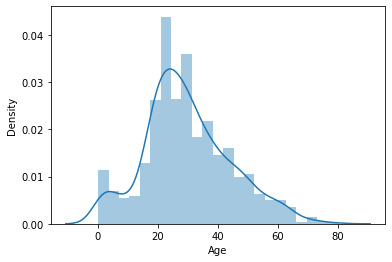

In [925]:
sns.distplot(concat_all['Age'])

In [926]:
for idx in age_null_idx_list:
    pred_age = concat_all[(concat_all['Pclass'] == concat_all.iloc[idx,concat_all.columns.get_loc('Pclass')]) & 
                          (concat_all['Cabin'] == concat_all.iloc[idx,concat_all.columns.get_loc('Cabin')]) & 
                          (concat_all['Fare'] == concat_all.iloc[idx,concat_all.columns.get_loc('Fare')]) & 
                          (concat_all['Alone'] == concat_all.iloc[idx,concat_all.columns.get_loc('Alone')])]['Age'].mean()
    
    if not np.isnan(pred_age):
        concat_all.iloc[idx,concat_all.columns.get_loc('Age')] = pred_age
    else:
        concat_all.iloc[idx,concat_all.columns.get_loc('Age')] = concat_all['Age'].mean()

In [927]:
concat_all['Age'].isnull().sum()

0

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

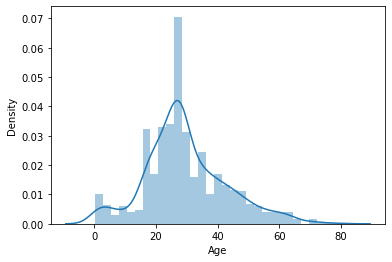

In [928]:
sns.distplot(concat_all['Age'])

In [930]:
concat_all['AgeBand'] = pd.cut(concat_all['Age'],5)

In [931]:
concat_all.groupby('AgeBand')[['Survived']].mean()

,Survived
AgeBand,
"(0.0902, 16.136]",0.550000
"(16.136, 32.102]",0.333333
"(32.102, 48.068]",0.418919
"(48.068, 64.034]",0.434783
"(64.034, 80.0]",0.090909


In [933]:
concat_all.loc[ (concat_all['Age'] <= 16),'Age'] = 1
concat_all.loc[ (concat_all['Age'] > 16) & (concat_all['Age']<=32),'Age'] = 2
concat_all.loc[ (concat_all['Age'] > 32) & (concat_all['Age']<=48),'Age'] = 3
concat_all.loc[ (concat_all['Age'] > 48) & (concat_all['Age']<=64),'Age'] = 4
concat_all.loc[ (concat_all['Age'] > 64),'Age'] = 5

In [934]:
concat_all.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone,AgeBand
0,1,0.0,3,2,2.0,1,1,1,5,0,"(16.136, 32.102]"
1,2,1.0,1,1,3.0,4,4,2,1,0,"(32.102, 48.068]"
2,3,1.0,3,1,2.0,2,1,1,2,1,"(16.136, 32.102]"
3,4,1.0,1,1,3.0,4,4,1,1,0,"(32.102, 48.068]"
4,5,0.0,3,2,3.0,2,1,1,5,1,"(32.102, 48.068]"


In [935]:
concat_all['Age'] = concat_all['Age'].astype(int)
concat_all.drop('AgeBand',axis=1,inplace=True)

In [936]:
concat_all.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
0,1,0.0,3,2,2,1,1,1,5,0
1,2,1.0,1,1,3,4,4,2,1,0
2,3,1.0,3,1,2,2,1,1,2,1
3,4,1.0,1,1,3,4,4,1,1,0
4,5,0.0,3,2,3,2,1,1,5,1


In [961]:
new_train = concat_all.loc[:train.shape[0]-1,'Survived':]

In [962]:
new_train.tail()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
886,0.0,2,2,2,2,1,1,4,1
887,1.0,1,1,2,3,5,1,2,1
888,0.0,3,1,2,3,2,1,2,0
889,1.0,1,2,2,3,4,2,5,1
890,0.0,3,2,2,1,1,3,5,1


In [963]:
new_train['Survived'] = new_train['Survived'].astype(int)

In [964]:
new_train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
0,0,3,2,2,1,1,1,5,0
1,1,1,1,3,4,4,2,1,0
2,1,3,1,2,2,1,1,2,1
3,1,1,1,3,4,4,1,1,0
4,0,3,2,3,2,1,1,5,1


In [965]:
new_test = concat_all.loc[train.shape[0]:,'Pclass':]

In [966]:
new_test.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Alone
891,3,2,3,1,1,3,5,1
892,3,1,3,1,1,1,1,0
893,2,2,4,2,1,3,5,1
894,3,2,2,2,1,1,5,1
895,3,1,2,2,1,1,1,0


In [991]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

models = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

result = pd.DataFrame(columns=['Model','Accuracy'])

sss = StratifiedShuffleSplit(n_splits=10,random_state=0,test_size=0.1)

x = new_train.iloc[:,1:]
y = new_train.iloc[:,0]

score_dict = {}

for train_idx, test_idx in sss.split(x,y):
    x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    for model in models:
        name = model.__class__.__name__
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test,y_pred)
        if name in score_dict:
            score_dict[name] += acc
        else:
            score_dict[name] = acc
            

In [1036]:
for model_name in score_dict:
    score_dict[model_name] = score_dict[model_name] / 10 * 100
    result.append( pd.DataFrame([[model_name,score_dict[model_name]]] ,columns=['model','accuracy']) )

In [1037]:
result

,Model,Accuracy
